In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
from math import pi

%matplotlib inline

import platform
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
def load_data(data, param, scaler, add_n=1):
    data.fillna(0, inplace=True)
    clients = data[param].to_list()
    data = data.drop(param, axis=1)
    columns = data.columns
    data = pd.DataFrame(
                        scaler.fit_transform(data),
                        columns=columns
                        )
    data += add_n
    return data, clients

def draw_polar(df, param, cnt, size, save, ylim=2.1):
    labels = df.columns[:]
    num_labels = len(labels)

    angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)]
    angles += angles[:1]

    my_palette = plt.cm.get_cmap("Set1", len(df.index))

    fig = plt.figure(figsize=(size,20))
    fig.set_facecolor('white')

    for i, row in df.iterrows():
        color = my_palette(i)
        data = df.iloc[i].tolist()
        data += data[:1]

        ax = plt.subplot(1,cnt,i+1, polar=True)
        ax.set_theta_offset(pi / 2)
        ax.set_theta_direction(-1)

        plt.xticks(angles[:-1], labels, fontsize=20)
        ax.tick_params(axis='x', which='major', pad=15)

        ax.set_rlabel_position(0)
        plt.yticks([0,0.2,0.4,0.6,0.8,1.0], fontsize=7)
        plt.ylim(0, ylim)

        ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
        ax.fill(angles, data, color=color, alpha=0.4)

        plt.title(param[i], size=30, color=color, y=1.21)

    plt.tight_layout() # pad = 5 간격
    if save == True:
        plt.savefig('radar_chart {0}.png'.format(param), dpi=200) # dpi 해상도
    else:
        pass
    plt.show()

In [6]:
df = pd.read_excel('Radar_Chart.xlsx')
df.head()

,공구_상품명,피드갯수,도달수,인스타그램_참여율_1,인스타그램_참여율_2,홈페이지_방문자수,신규가입자수,객단가,공구_제품_판매량
0,리프팅 마스크,21,108932,0.157481,2.912686,2265,163,61878,53012249
1,벚꽃 트위드,10,49252,0.128993,2.579528,2791,79,224061,11220030
2,스크럽,13,91372,0.160603,2.012156,1880,99,97302,41407238
3,작심차,13,60077,0.177127,2.948137,1528,133,132632,6303684
4,트렌치코트,20,116435,0.141875,2.622689,1860,143,186131,16358410


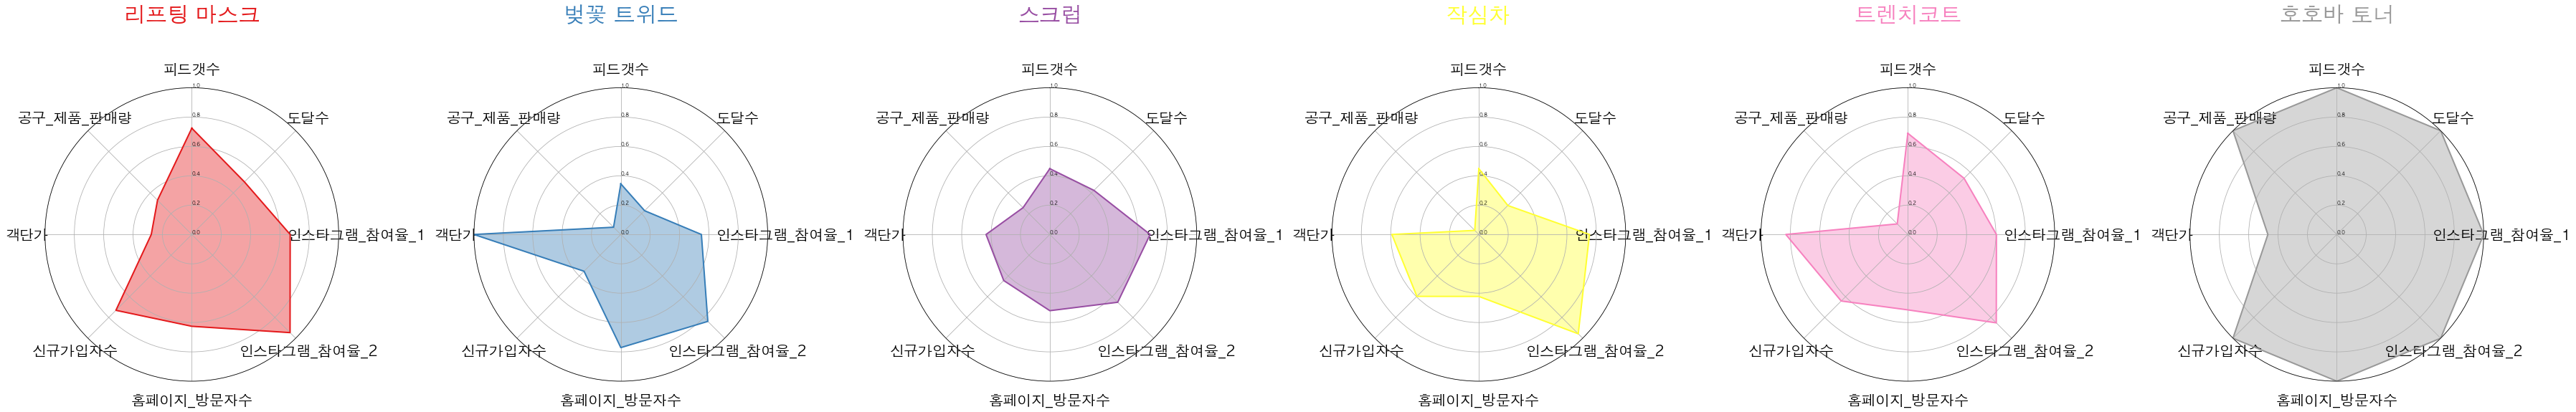

In [17]:
# False를 True로 바꾸면 이미지가 저장됨.
draw_polar(*load_data(df,'공구_상품명', MaxAbsScaler(), add_n=0), df.shape[0], 50, False, ylim=1)

6